In [1]:
import sys, os
sys.path.insert(1, '../utils')

In [2]:
import time, os, json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from operator import is_not
from functools import partial
%matplotlib inline

In [3]:
gptj_c = '#d00000'
gpt3_c = '#ffba08'
pr_c = '#8fe388'
kr_c = '#1b998b'
knn_c = '#3185fc'
nn_c = '#5d2e8c'
xg_c = '#ff7b9c'
rf_c = '#ff9b85'
gp_c = '#997b66'
true_c = '#cbff8c'

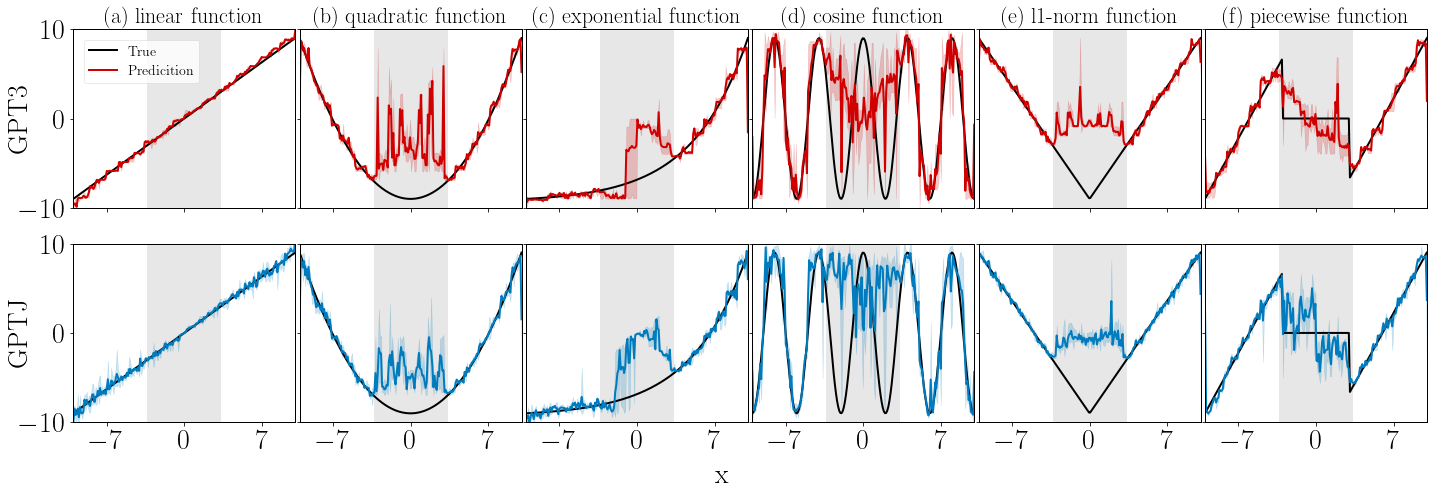

In [4]:
standard_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]
func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
width = 20
height = 7

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.05, bottom=.14, right=0.99, top=0.92, wspace=0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    file = standard_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    gptj_grid_y = []
    train_x, train_y = [], []
    for sim_idx in range(3):
        folder = 'data_%d' % (sim_idx + 1)
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        gptj_grid_y.append(data_json['gptj_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    gptj_grid_y = np.array(gptj_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    
    # background color
    ax[0][i].set_facecolor('white') 
    ax[1][i].set_facecolor('white')
    
    ax[0][i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)    
    ax[1][i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)    
    sns.color_palette("Set2")
    
    # plot lines
    # sns.lineplot(x = other_grid_x, y = lr_grid_y, label='LR', linewidth = 2, ax = ax[i])

#     sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = nn_grid_y, label='NN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[i])
    
    ax[0][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = true_c)
    ax[1][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = true_c)
    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, color = gptj_c, label='Predicition', linewidth = 2, ax = ax[0][i], palette = [gpt3_c])
    
    sns.lineplot(x = other_grid_x, y = gptj_grid_y, color = '#007CBE', label='Prediction', linewidth = 2, ax = ax[1][i], palette = [gpt3_c])
    
    ax[0][i].get_legend().remove()
    ax[0][i].set_title(func_list[i], fontsize = 22)
    ax[0][i].set_xlim(-10,10)
    ax[0][i].set_xticks([-7, 0, 7])
    ax[0][i].set_ylim(-10,10)

    
    ax[1][i].get_legend().remove()
    # ax[1][i].set_title(func_list[i], fontsize = 25)
    ax[1][i].set_xlim(-10,10)
    ax[1][i].set_xticks([-7, 0, 7])
    ax[1][i].set_ylim(-10,10)
    
ax[0][0].legend(fontsize = 14, bbox_to_anchor=(0.6, 0.66), ncol = 1)
# ax[0].legend(fontsize = 20, bbox_to_anchor=(0.2, 0.96), ncol = 1)
ax[0][0].set_ylabel('GPT3', labelpad = -13)
ax[1][0].set_ylabel('GPTJ', labelpad = -13)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
# fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig(os.path.join('../figures','donut.pdf'))
None

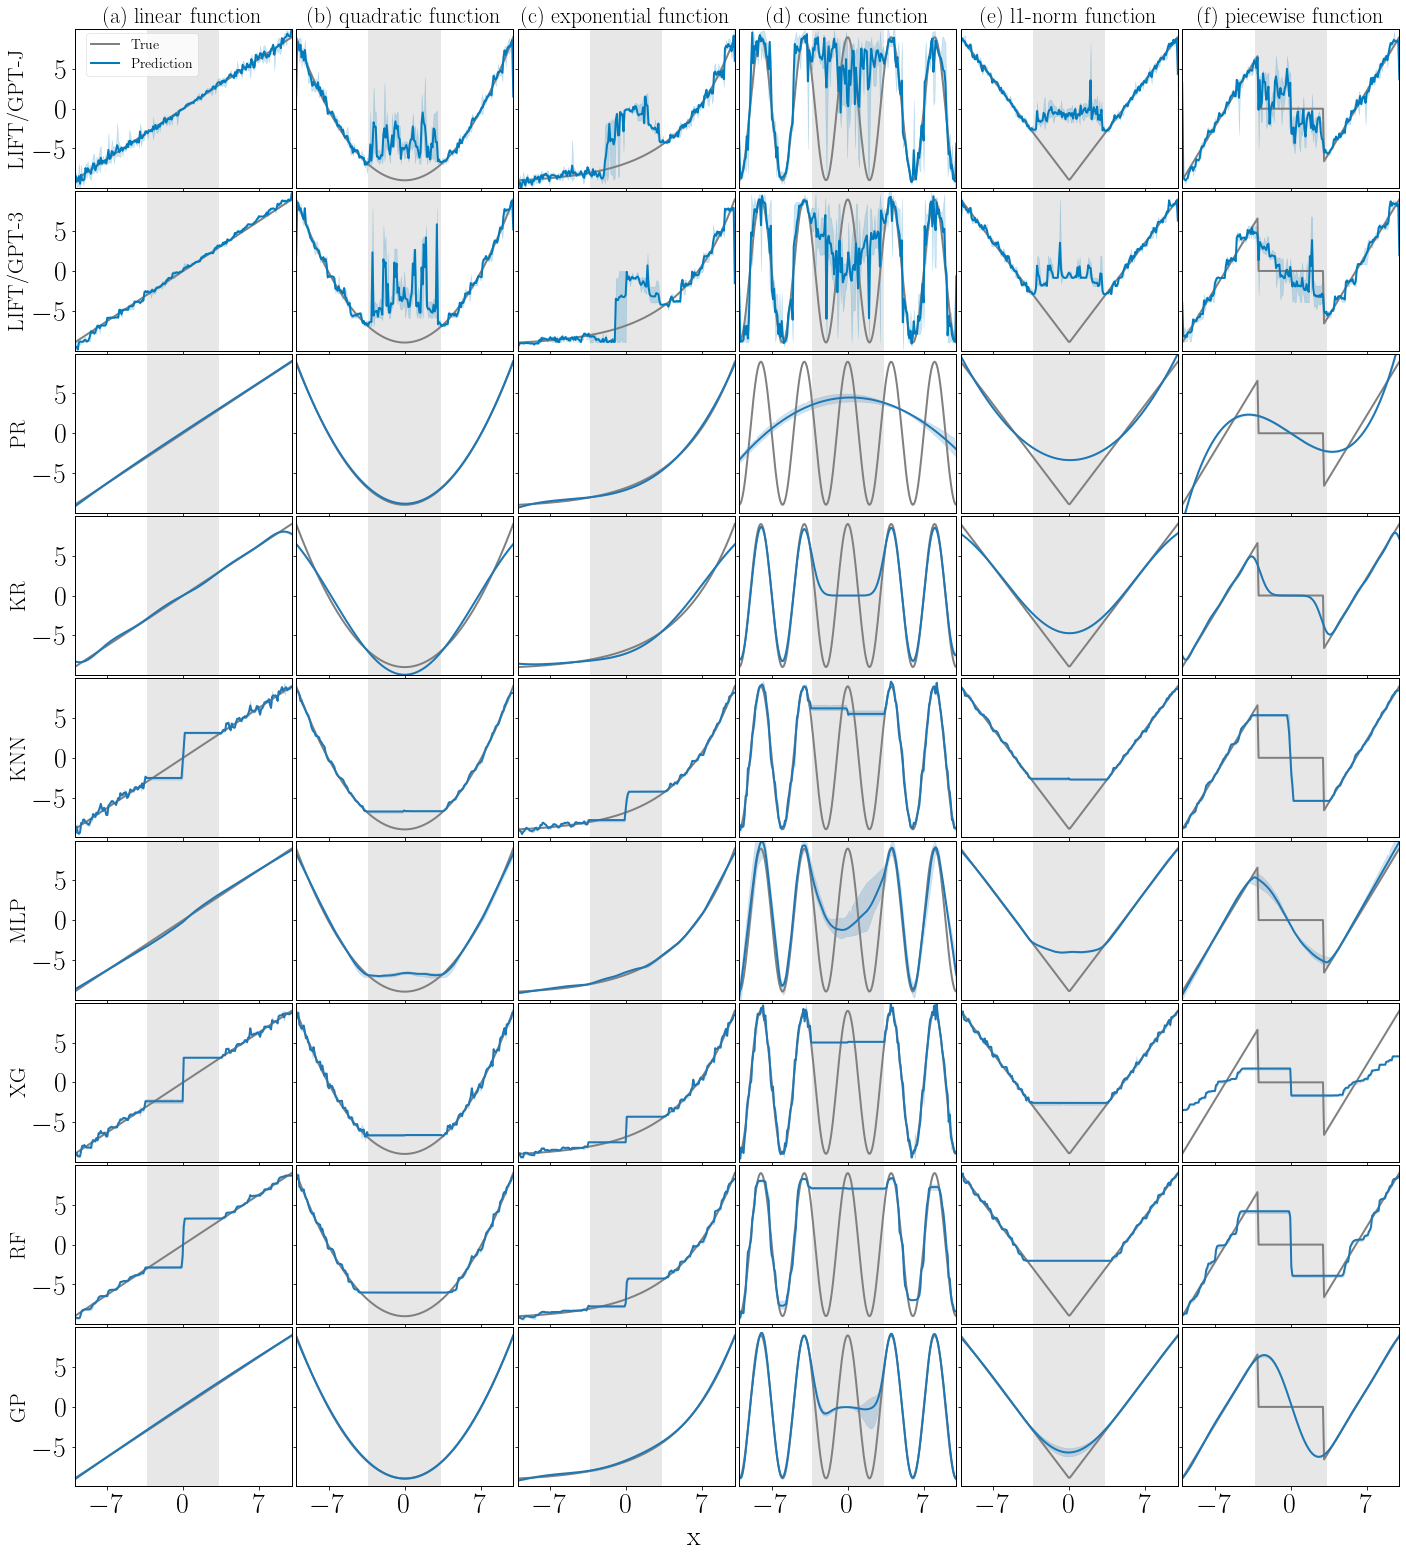

In [4]:
standard_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]
func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
method_list = ['LIFT/GPT-J', 'LIFT/GPT-3', 'PR', 'KR', 'KNN', 'MLP', 'XG', 'RF', 'GP']
width = 20
height = 22

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=9, ncols=6, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.07, bottom=.05, right=0.99, top=0.97, wspace=0.02, hspace = 0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    file = standard_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    gptj_grid_y = []
    train_x, train_y = [], []
    for sim_idx in range(3):
        folder = 'data_%d' % (sim_idx + 1)
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        gptj_grid_y.append(data_json['gptj_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    gptj_grid_y = np.array(gptj_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    
    for row in range(9):
        ax[row][i].set_facecolor('white')
        ax[row][i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
        ax[row][i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1)   
        ax[row][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')

        ax[row][i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)    
        
        ax[row][i].set_xlim(-10,10)
        ax[row][i].set_xticks([-7, 0, 7])
        ax[row][i].set_yticks([-5, 0, 5])
        ax[row][i].set_ylim(-10,10)
        if i == 0: ax[row][i].set_ylabel(method_list[row], fontsize = 22)
    sns.color_palette("Set2")
    
    # plot lines
    # sns.lineplot(x = other_grid_x, y = lr_grid_y, label='LR', linewidth = 2, ax = ax[i])

    sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[2][i])
    sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[3][i])
    sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[4][i])
    sns.lineplot(x = other_grid_x, y = nn_grid_y, label='MLP', linewidth = 2, ax = ax[5][i])
    sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[6][i])
    sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[7][i])
    sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[8][i])
    
    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    sns.lineplot(x = other_grid_x, y = gptj_grid_y, color = '#007CBE', label='Prediction', linewidth = 2, ax = ax[0][i], palette = [gpt3_c])
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, color = '#007CBE', label='Predicition', linewidth = 2, ax = ax[1][i], palette = [gpt3_c])
    ax[0][i].set_title(func_list[i], fontsize = 22)

    for row in range(9):
        try:
            ax[row][i].get_legend().remove()
        except:
            pass
ax[0][0].legend(fontsize = 14, bbox_to_anchor=(0.6, 0.66), ncol = 1)
# ax[0].legend(fontsize = 20, bbox_to_anchor=(0.2, 0.96), ncol = 1)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
# fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig(os.path.join('../figures','donut.pdf'))
None